# Log Analysis with CountVectorizer for probe

In [1]:
import pandas as pd
import plotly.plotly as py

In [49]:
df = pd.read_csv("../input/probe.log.1",sep='\t',index_col=False,
                 header=None,names=['time','comp','handle','level','main','code','line','empty','log_entry'])

In [16]:
df.head()

,time,comp,handle,level,main,code,line,empty,log_entry
0,2019-04-30 06:49:00.013641,probe,W 000000A9,INFO,Main,rollups_processor.cc,805.0,NaN,Rollups processor: new sample 1556621340000000000
1,2019-04-30 06:49:00.013665,probe,W 000000AC,INFO,Main,rollups_processor.cc,805.0,NaN,Rollups processor: new sample 1556621340000000000
2,2019-04-30 06:49:00.043224,probe,SSLSessionsCollector,INFO,Main,ssl_collector.cc,229.0,NaN,SSL Collector: Sending TDS heartbeat. Reported 0 SSL sessions this min
3,2019-04-30 06:49:49.398355,probe,main,INFO,Main,dispatcher_input.cc,369.0,NaN,"[dispatcher_input] - Total packets 4935684842423, adapter dropped packets 46243078"
4,2019-04-30 06:49:49.398510,probe,main,INFO,Main,simple_circular_buffer.cc,106.0,NaN,"[simple_circular_buffer] (0) (000000A7)- Queue size 0, head 462336, tail 462336, total packets 5..."


In [4]:
# check if there is any rows with empty log entry column
df[df.log_entry.isnull()]

,time,comp,handle,level,main,code,line,empty,log_entry


In [27]:
pd.options.display.max_colwidth = 100 # controls max display
df1 = df[df.level != 'INFO']
#df1.iloc[:,:9]
df1[['level','code','log_entry']]

,level,code,log_entry
8405,NaN,NaN,NaN
8406,NaN,NaN,NaN
8407,NaN,NaN,NaN
8408,NaN,NaN,NaN
8409,NaN,NaN,NaN
8410,NaN,NaN,NaN
8411,NaN,NaN,NaN
8412,NaN,NaN,NaN
8413,NaN,NaN,NaN
8414,NaN,NaN,NaN


## Count Unigrams

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['log_entry'], 20)
for word, freq in common_words:
    print(word, freq)

/Users/kselvadurai/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning:

numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88

/Users/kselvadurai/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning:

numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88

/Users/kselvadurai/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning:

numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88

/Users/kselvadurai/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning:

numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88



instances 11501
samples 11493
connections 11440
rollups 11438
processor 11438
time 5720
basic 5720
send 5720
send_to_stitcher 5720
marker 5720
exported 5720
tcp 5720
new 5718
sample 5718
bytes 3826
allocations 3779
ssl 1475
64 1410
packets 1278
total 1207


## Bigrams

In [6]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['log_entry'], 20)
for word, freq in common_words:
    print(word, freq)

rollups processor 11438
send_to_stitcher send 5720
send time 5720
time marker 5720
processor exported 5720
basic connections 5720
tcp connections 5720
processor new 5718
new sample 5718
total packets 1207
queue size 1136
size head 1016
statistics for 755
for handle 755
heartbeat reported 714
this min 714
sessions this 714
sending tds 714
tds heartbeat 714
ssl sessions 714


## Trigrams

In [7]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['log_entry'], 20)
for word, freq in common_words:
    print(word,"\t",freq)

rollups processor exported 	 5720
send_to_stitcher send time 	 5720
send time marker 	 5720
processor new sample 	 5718
rollups processor new 	 5718
queue size head 	 1016
statistics for handle 	 755
reported ssl sessions 	 714
sending tds heartbeat 	 714
ssl collector sending 	 714
collector sending tds 	 714
tds heartbeat reported 	 714
sessions this min 	 714
ssl sessions this 	 714
heartbeat reported ssl 	 714
64 bytes 64 	 705
bytes 64 allocations 	 705
head tail total 	 568
tail total packets 	 568
size head tail 	 568


## Generate WorldCloud

In [8]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

def plot_world_cloud (text):
    # Create stopword list:
    stopwords = set(STOPWORDS)
    stopwords.update(["pkts", "msec", "file"])

    # Create and generate a word cloud image:
    wordcloud = WordCloud(width=500, height=350, stopwords=stopwords, max_words=100, background_color="white").generate(text)
    #wordcloud = WordCloud(width=500, height=350, max_words=100, background_color="white").generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

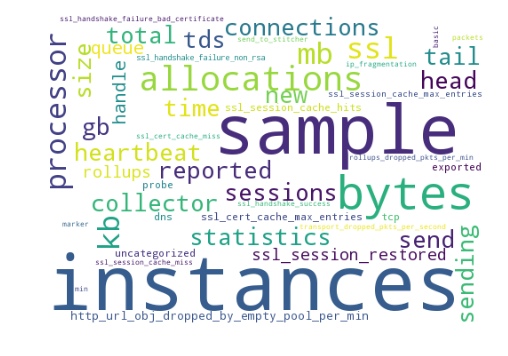

In [19]:
text = " ".join(word.lower() for word,freq in get_top_n_bigram(df['log_entry'], 100))

plot_world_cloud(text)

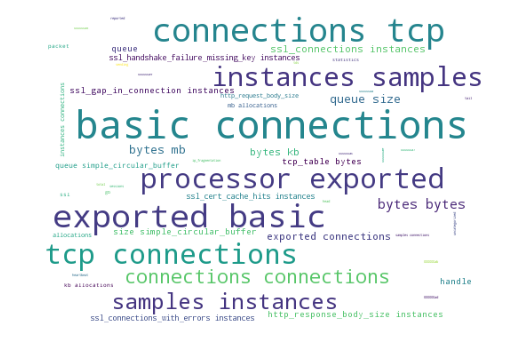

In [21]:
text = " ".join(word.lower() for word,freq in get_top_n_trigram(df['log_entry'], 1000))

plot_world_cloud(text)

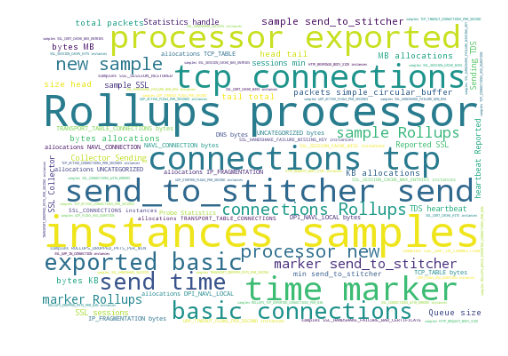

In [50]:
text = " ".join(word for word in df.log_entry)

plot_world_cloud(text)